In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc,classification_report, accuracy_score, precision_recall_curve,confusion_matrix
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import joblib

In [4]:
data=pd.read_csv('Dev_data_to_be_shared.csv')
data.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("\nTarget Variable Distribution (Frequency and %):")
distribution = data['bad_flag'].value_counts().to_frame(name='Frequency')
distribution['Percentage (%)'] = (distribution['Frequency'] / len(data) * 100).round(2)
print(distribution)


Target Variable Distribution (Frequency and %):
          Frequency  Percentage (%)
bad_flag                           
0             95434           98.58
1              1372            1.42



Target Variable Distribution (Frequency and %):
          Frequency  Percentage (%)
bad_flag                           
0             95434           98.58
1              1372            1.42
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB
None


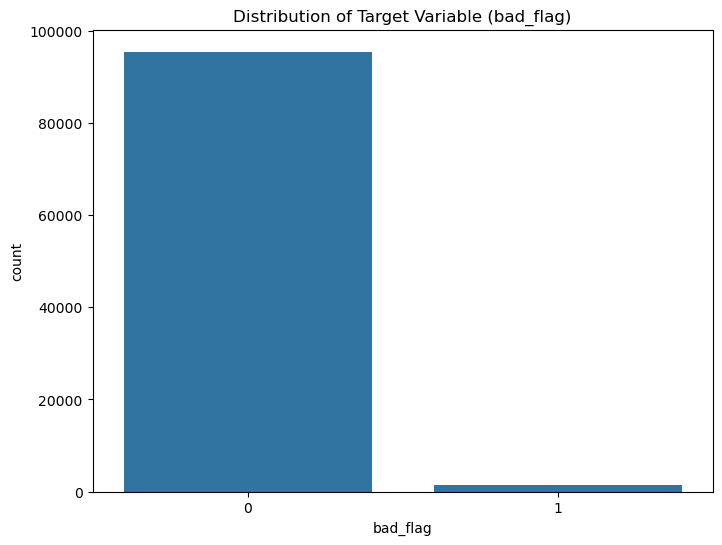

In [6]:
print("\nTarget Variable Distribution (Frequency and %):")
distribution = data['bad_flag'].value_counts().to_frame(name='Frequency')
distribution['Percentage (%)'] = (distribution['Frequency'] / len(data) * 100).round(2)
print(distribution)
print("Dataset Information:")
print(data.info())
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='bad_flag')
plt.title('Distribution of Target Variable (bad_flag)')
plt.show()

In [7]:
#from the csv file we have
#48 onus attribute columns
#664 transaction attribute columns
#452 bureau columns
#50 bureau enquiry columns


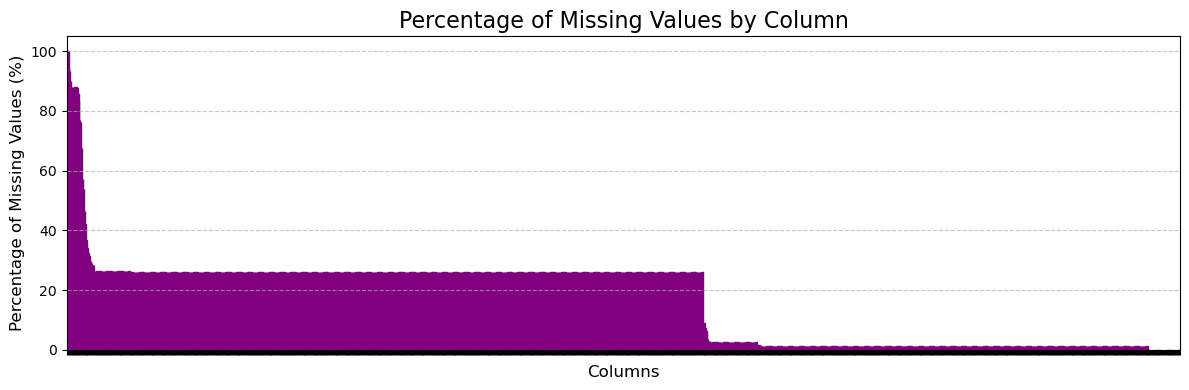

In [8]:
missing=data.isnull().mean() * 100
missing_percentages=missing.sort_values(ascending=False)

plt.figure(figsize=(12,4))
missing_percentages.plot(kind='bar', edgecolor='purple')

plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(ticks=range(len(missing_percentages)), labels=[''] * len(missing_percentages), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [9]:
mode=missing.mode()
mode

0    26.063467
dtype: float64

In [10]:
columns_with_high_nan=missing[missing > 27]

num_high_nan_columns=len(columns_with_high_nan)

high_nan_column_names=columns_with_high_nan.index.tolist()

print(f"Number of columns with more than 27% missing values: {num_high_nan_columns}")
print("Column names with more than 27% missing values:")
print(high_nan_column_names)

Number of columns with more than 27% missing values: 30
Column names with more than 27% missing values:
['bureau_147', 'bureau_148', 'bureau_433', 'bureau_434', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_440', 'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'bureau_451', 'onus_attribute_6', 'onus_attribute_7', 'onus_attribute_8', 'onus_attribute_9', 'onus_attribute_11', 'onus_attribute_12', 'onus_attribute_14', 'onus_attribute_15', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']


In [11]:
b_cols=high_nan_column_names[0:16]
b_cols

['bureau_147',
 'bureau_148',
 'bureau_433',
 'bureau_434',
 'bureau_435',
 'bureau_436',
 'bureau_437',
 'bureau_438',
 'bureau_440',
 'bureau_444',
 'bureau_445',
 'bureau_446',
 'bureau_447',
 'bureau_448',
 'bureau_449',
 'bureau_451']

In [12]:
freq=data['bad_flag'].value_counts()
freq

bad_flag
0    95434
1     1372
Name: count, dtype: int64

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001B6C53C1DA0>
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\Lib\site-packages\matplotlib\transforms.py", line 195, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))
KeyboardInterrupt: 


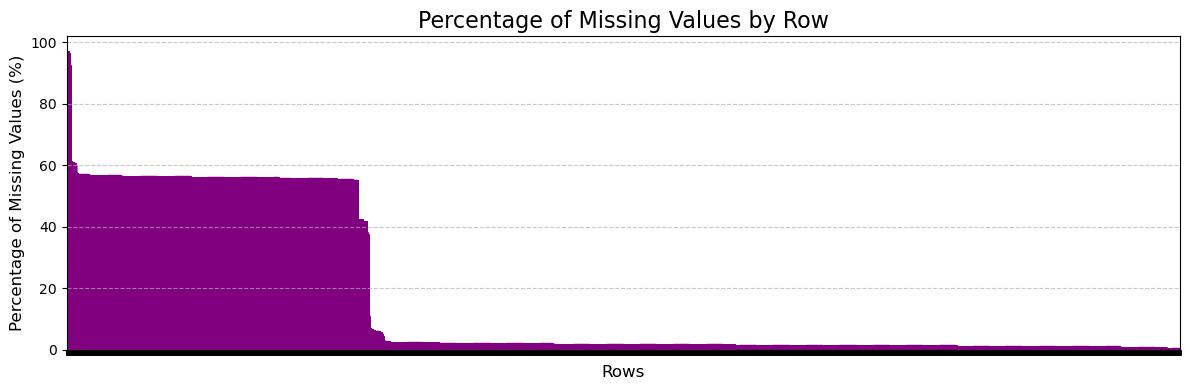

In [13]:
missing_r=data.isnull().mean(axis=1) * 100
missing_percentages_r = missing_r.sort_values(ascending=False)

plt.figure(figsize=(12,4))
missing_percentages_r.plot(kind='bar', edgecolor='purple')

plt.title('Percentage of Missing Values by Row', fontsize=16)
plt.xlabel('Rows', fontsize=12)
plt.ylabel('Percentage of Missing Values (%)', fontsize=12)
plt.xticks(ticks=range(len(missing_percentages_r)), labels=[''] * len(missing_percentages_r), rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [14]:
mode_r=missing_r.mode()
mode_r

0    1.398026
dtype: float64

In [15]:
rows_with_high_nan=missing_r[missing_r > 50]

num_high_nan_rows=len(rows_with_high_nan)
print(num_high_nan_rows)
high_nan_row_names=rows_with_high_nan.index.tolist()

25233


In [16]:
rows_with_high_nan_data=data.loc[high_nan_row_names]

rows_with_bad_flag_1=rows_with_high_nan_data[rows_with_high_nan_data['bad_flag'] == 1]

num_bad_flag_1_rows=len(rows_with_bad_flag_1)

print(f"Number of rows with more than 50% NaN and bad_flag == 1 is {num_bad_flag_1_rows}")

Number of rows with more than 50% NaN and bad_flag == 1 is 322


In [18]:
new_data=data.drop(b_cols,axis=1)
new_data=new_data.drop(high_nan_row_names,axis=0)
new_data.shape

(71573, 1200)

In [19]:
input_nan=new_data.iloc[:,2:]
input_nan.shape

(71573, 1198)

In [20]:
input=input_nan.fillna(input_nan.median())
input.isna().any().any()

np.False_

In [22]:
output=new_data.iloc[:,1]
output.head()

1    0
2    0
3    0
4    0
5    0
Name: bad_flag, dtype: int64


Random Forest Model Metrics:
Accuracy: 0.9806166645224924
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     21070
           1       1.00      0.80      0.89      2249

    accuracy                           0.98     23319
   macro avg       0.99      0.90      0.94     23319
weighted avg       0.98      0.98      0.98     23319



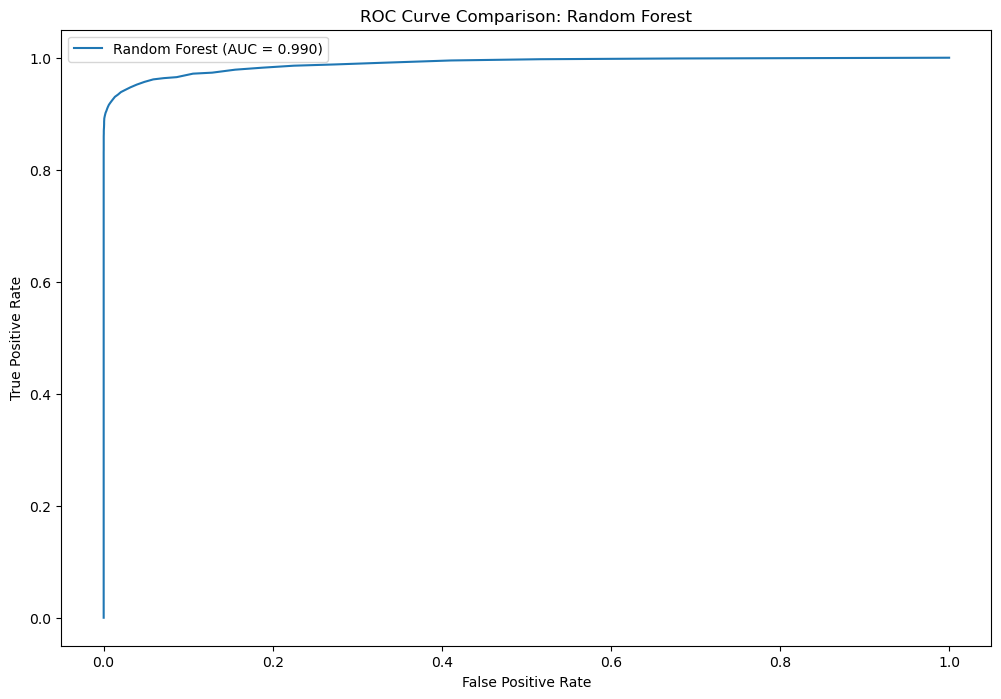


Optimal Threshold for F1-Score: 0.300000

Classification Report with Tuned Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     21070
           1       0.99      0.89      0.94      2249

    accuracy                           0.99     23319
   macro avg       0.99      0.95      0.97     23319
weighted avg       0.99      0.99      0.99     23319


Confusion Matrix with Tuned Threshold:
[[21055    15]
 [  244  2005]]


In [24]:
adasyn=ADASYN(random_state=81,sampling_strategy=0.1)
X_train, y_train=adasyn.fit_resample(input, output)
X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.3, random_state=4772)


model5=RandomForestClassifier()
model5.fit(X_train, y_train)
y_pred=model5.predict(X_test)
y_pred_proba=model5.predict_proba(X_test)[:, 1]

print("\nRandom Forest Model Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


fpr_rf, tpr_rf, _=roc_curve(y_test, y_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(12, 8))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest')
plt.legend()
plt.show()



precision, recall, thresholds=precision_recall_curve(y_test, y_pred_proba)

f1_scores=2 * (precision * recall) / (precision + recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=thresholds[optimal_idx]
print(f"\nOptimal Threshold for F1-Score: {optimal_threshold:.6f}")
y_pred_new_threshold=(y_pred_proba >= optimal_threshold).astype(int)




print("\nClassification Report with Tuned Threshold:")
print(classification_report(y_test, y_pred_new_threshold))
print("\nConfusion Matrix with Tuned Threshold:")
print(confusion_matrix(y_test, y_pred_new_threshold))

In [26]:
joblib.dump(model5, 'random_forest_model_final5.pkl')

['random_forest_model_final5.pkl']

In [27]:
vdata=pd.read_csv('validation_data_to_be_shared.csv')
vdata.isna().any().any()

np.True_

In [28]:
new_val_data=vdata.drop(b_cols,axis=1)
new_val_data.shape

(41792, 1199)

In [29]:
input_val_nan=new_val_data.iloc[:,1:]

input_val=input_val_nan.fillna(input_nan.median())
input_val.isna().any().any()

np.False_

In [30]:
input_val.shape

(41792, 1198)

In [31]:
acc=new_val_data['account_number']
acc.shape

(41792,)

In [32]:
y_pred_proba=model5.predict_proba(input_val) 
y_pred_proba.shape


(41792, 2)

In [33]:
y_pred_proba_1=y_pred_proba[:,1]

In [34]:
val_results=pd.DataFrame({
    'account_number': acc,
    'probability of default': y_pred_proba_1
})

val_results.to_csv('val_probabilities.csv', index=False)

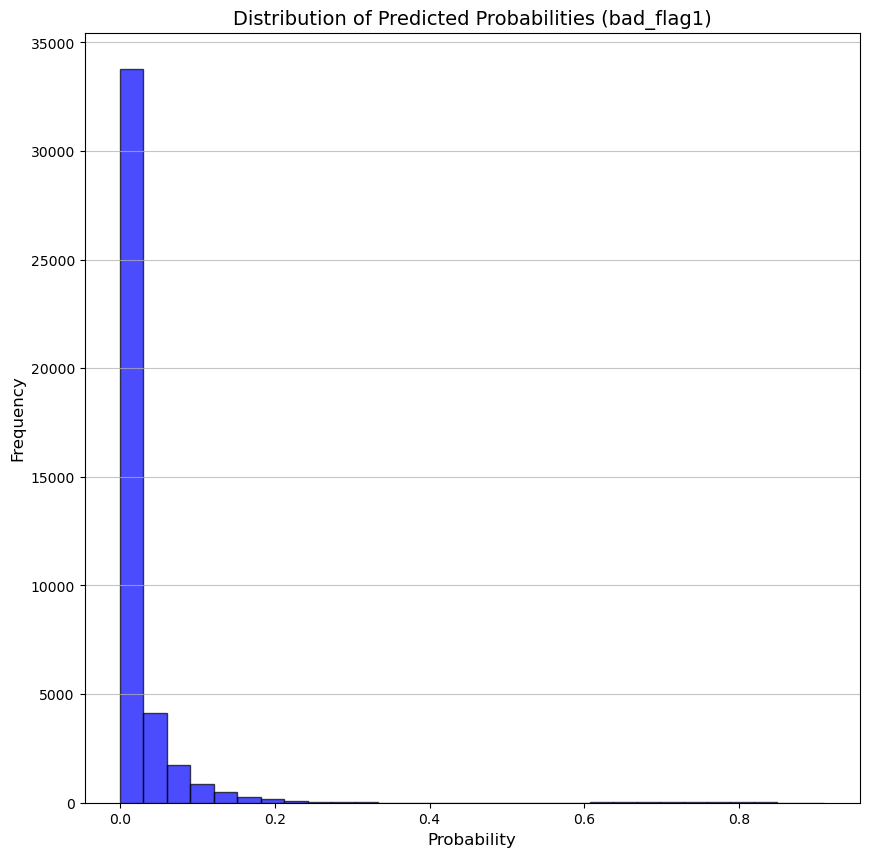

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.hist(y_pred_proba_1, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Predicted Probabilities (bad_flag1)', fontsize=14)
plt.xlabel('Probability', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()
